In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
df = pd.read_csv("D:\project\online_shoppers_intention.csv")
df.head()

# Step 2: Check for missing values
print(df.isnull().sum())



Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Hp\AppData\Local\Temp\ipykernel_2820\339786329.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\project\online_shoppers_intention.csv")


In [7]:
# Convert boolean columns to integers
df["Weekend"] = df["Weekend"].astype(int)
# Convert 'Revenue' to integer and replace value 2 with 1
df["Revenue"] = df["Revenue"].astype(int).replace(2, 1)

# Check the result
print(df[["Weekend", "Revenue"]].dtypes)
print(df['Revenue'].unique())

Weekend    int64
Revenue    int64
dtype: object
[0 1]


In [8]:
# Identify categorical (object) columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)

Categorical columns:
 Index(['Month', 'VisitorType'], dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

In [84]:
df = pd.get_dummies(df, columns=cat_cols)
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_3  Month_4  \
0     3.667189   3.229316   -0.317178   -0.308821  ...    False    False   
1    -0.457683   1.171473   -0.317178   -0.308821  ...    Fa

In [10]:
# Separate features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Final preprocessed dataset
print(X.head())
print(y.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

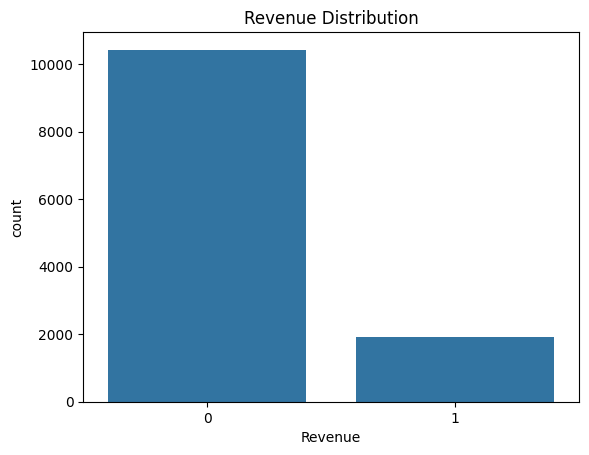

In [11]:
#visualization
#target variable distribution(revenue)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Revenue')
plt.title("Revenue Distribution")
plt.show()

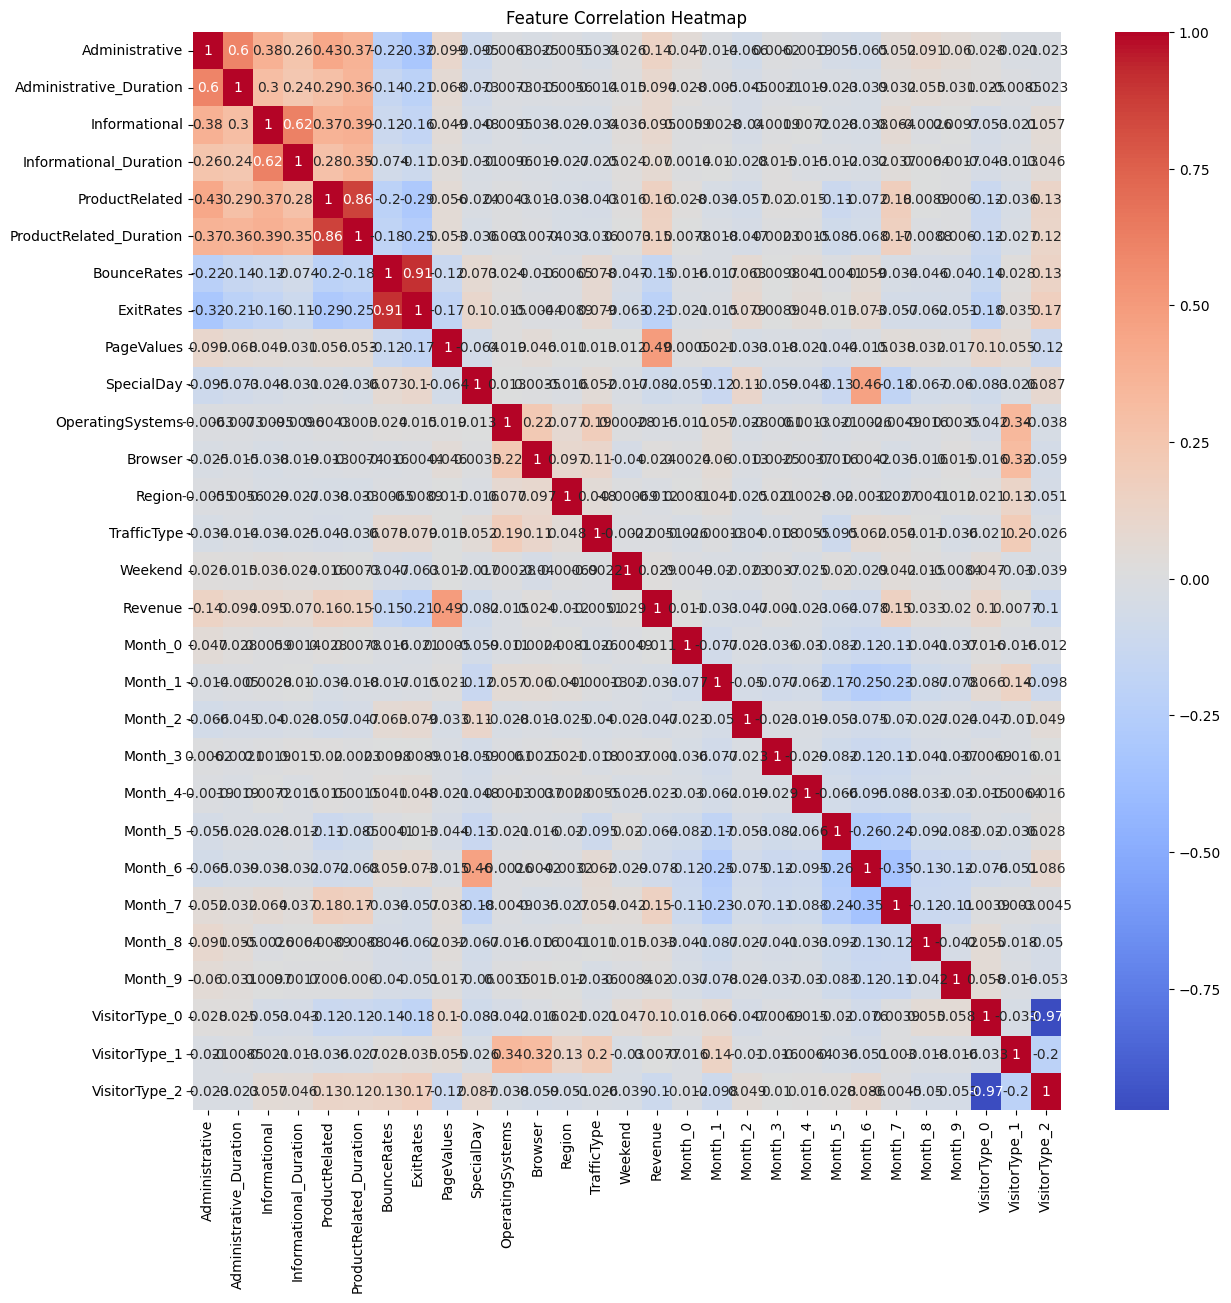

In [87]:
#correlation heatmap(before scaling)
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

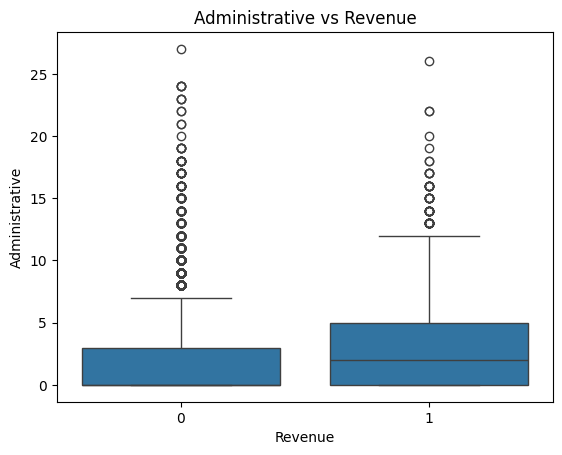

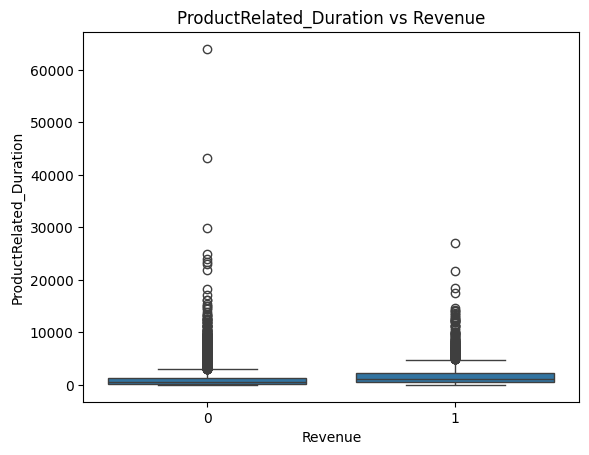

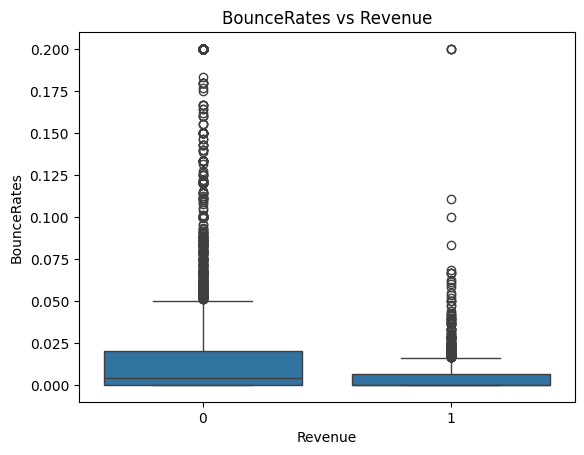

In [12]:
#boxplots of important features vs revenue
features = ['Administrative', 'ProductRelated_Duration', 'BounceRates']
for col in features:
    sns.boxplot(data=df, x='Revenue', y=col)
    plt.title(f"{col} vs Revenue")
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

In [76]:
# Removing incorrect scaling step

In [15]:
# Z-Score Method (Standard Deviation Based)
from scipy.stats import zscore
import numpy as np

# Compute Z-scores for numeric columns
z_scores = np.abs(zscore(df[numeric_cols]))

# Flag entries with any z-score > 3 as outliers
outliers_z = (z_scores > 3).any(axis=1)

# Number of outliers
print(f"Z-score outliers found: {outliers_z.sum()}")

Z-score outliers found: 2301


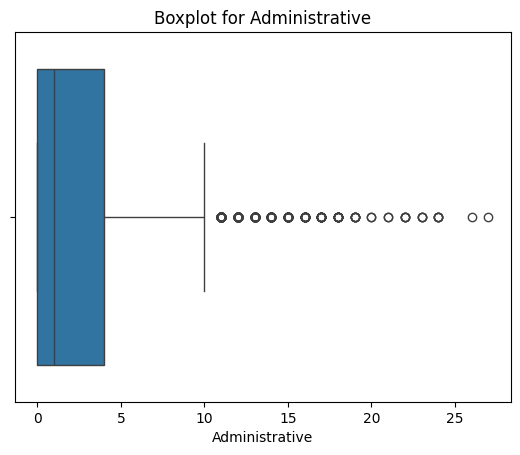

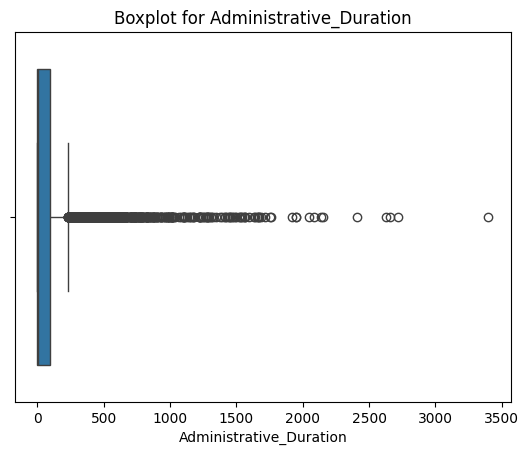

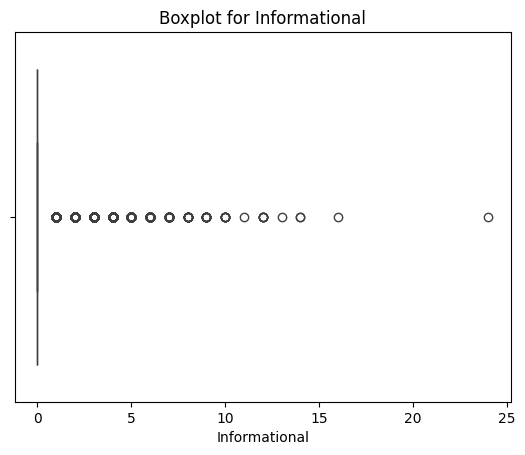

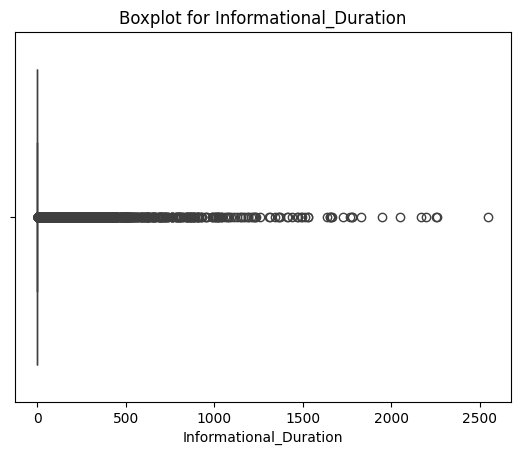

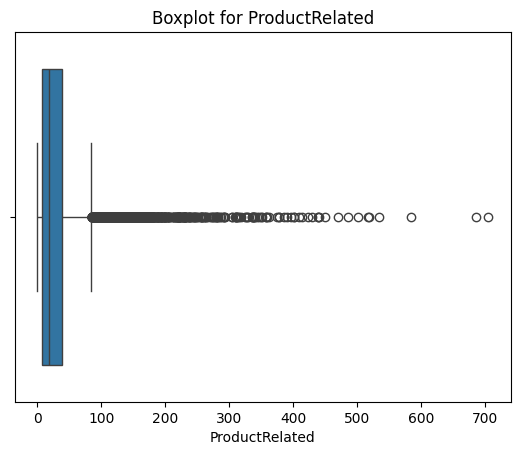

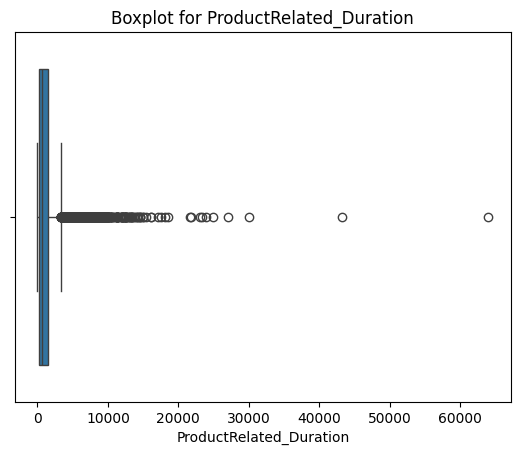

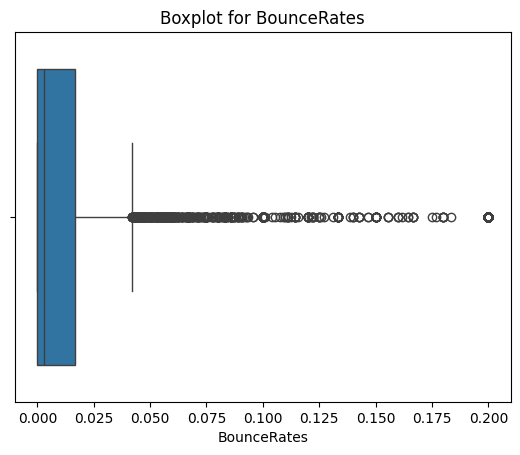

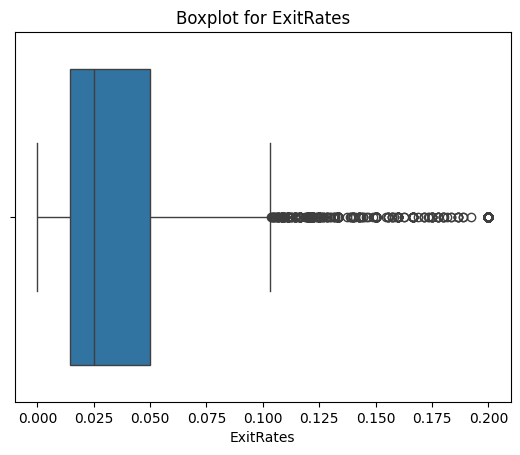

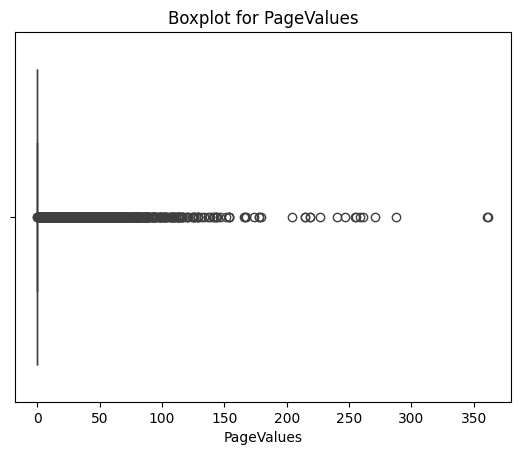

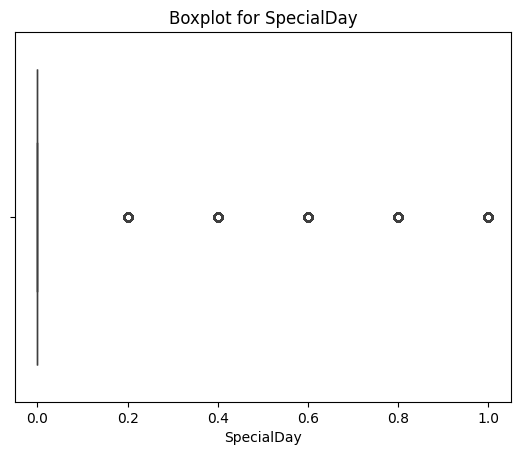

In [16]:
# Visual Outlier Detection
#Boxplot (Univariate)
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [17]:
# Ensure 'Revenue' is treated as the target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

# Scale the features (X) only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The target variable (y) should not be scaled for classification
y_train_ready = y_train # Use y_train directly for training
y_test_ready = y_test   # Use y_test directly for testing
print(y_train_ready.shape)
print(y_test_ready.shape)

(9864,)
(2466,)


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_ready) # Use y_train_ready which is not scaled

RandomForestClassifier(random_state=42)

In [21]:
print(df['Revenue'].unique())
print(df['Revenue'].dtype)

[0 1]
int64


In [22]:
# If it's boolean True/False
df['Revenue'] = df['Revenue'].astype(int)

# If it's strings like 'TRUE', 'FALSE'
# df['Revenue'] = df['Revenue'].map({'TRUE': 1, 'FALSE': 0})

In [23]:
print(df['Revenue'].value_counts())

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [75]:
# This step is now included in the previous cell
# Replace 2 with 1 so Revenue is binary
# df['Revenue'] = df['Revenue'].replace(2, 1)

In [24]:
print(df['Revenue'].unique())  # Should show: [0 1]

[0 1]


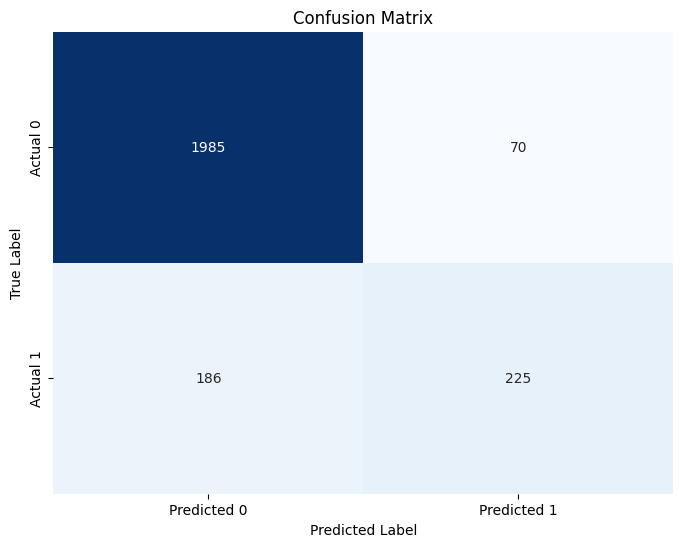

In [27]:
# model building (randomforestclassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_ready)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_ready, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#(logisticregression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Build model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2002   53]
 [ 268  143]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#train the svm model
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)


Accuracy: 0.8353609083536091

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2055
           1       0.86      0.01      0.03       411

    accuracy                           0.84      2466
   macro avg       0.85      0.51      0.47      2466
weighted avg       0.84      0.84      0.76      2466



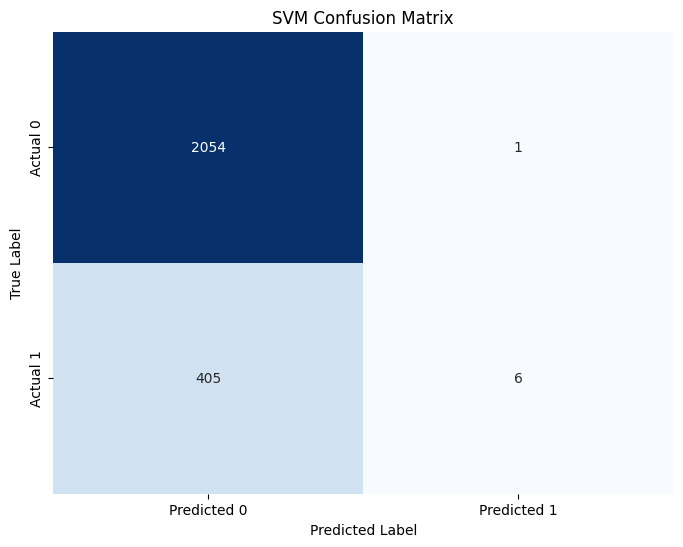

In [30]:
#Evaluate the model

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

In [32]:
#train gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)


In [33]:
#Evaluate the model
# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1971   84]
 [ 185  226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

